In [3]:
import _experiments as exp
from _experiments import CV, GCD, EIS
from importlib import reload
import pandas as pd
import numpy as np
import _ecplotting as ecp
import matplotlib.pyplot as plt
reload(exp)
reload(ecp)

<module '_ecplotting' from 'C:\\Users\\fes33\\Documents\\GIK - R&D\\Personal - Papers and Reports\\19 - Quadratic Model - Code with Classes\\EC\\EC3\\_ecplotting.py'>

### <font color = '#FF9933'> CV - Example - Find Capacity </font>

In [4]:
df = pd.read_csv(r'test_data/CV.csv')
cv = CV(df, extract_sr = True)

In [5]:
cv.find_capacity(cv.currents, frac = (0,0.5))
cv.find_quad_reg_param()
cv.find_quad_cap_diff()
cv.find_lin_reg_param()
cv.find_lin_cap_diff()
display(cv.find_capacitiveness(frac= (0, 0.5), model = 'Quadratic'))
display(cv.find_capacitiveness(frac= (0, 0.5), model = 'Linear'))

,%Capacitive@3mV/s,%Capacitive@5mV/s,%Capacitive@10mV/s,%Capacitive@20mV/s,%Capacitive@30mV/s,%Capacitive@40mV/s,%Capacitive@50mV/s
0,0.284723,0.330883,0.389897,0.435316,0.451495,0.457255,0.458238


,%Capacitive@3mV/s,%Capacitive@5mV/s,%Capacitive@10mV/s,%Capacitive@20mV/s,%Capacitive@30mV/s,%Capacitive@40mV/s,%Capacitive@50mV/s
0,0.137927,0.171192,0.226072,0.292338,0.335966,0.368774,0.395104


### <font color = '#FF9933'> GCD - Example - Fractional Time from Porridge </font>

In [69]:
# Import a porridge file with sheet GCDData(Raw)
file_path = r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\19 - Quadratic Model - Code with Classes\Data - Gamry Files\MOFs\EC Porridge - HKUST.xlsb"
file_path = r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\19 - Quadratic Model - Code with Classes\Data - Gamry Files\MOFs\EC Porridge - LiCuMOF.xlsb"
df_gcd = pd.read_excel(file_path, engine = 'pyxlsb', sheet_name = 'GCDData(Raw)', header = None)
df_gcd

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,EXPLAIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TAG,PWR800_CYCLICCHARGEDISCHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TITLE,LABEL,PWR Cyclic Charge Discharge,Test &Identifier,NaN,NaN,NaN,NaN,NaN,NaN,...,Test &Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATE,LABEL,44643,Date,NaN,NaN,NaN,NaN,NaN,NaN,...,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TIME,LABEL,0.752674,Time,NaN,NaN,NaN,NaN,NaN,NaN,...,Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,NaN,NaN,5964,298.25,0.015418,-0.000502,0,-0.000008,-0.4984,-0.002158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14727,NaN,NaN,5965,298.3,0.013575,-0.000502,0,-0.000007,-0.4984,-0.002153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14728,NaN,NaN,5966,298.35,0.011743,-0.000502,0,-0.000006,-0.4984,-0.002151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14729,NaN,NaN,5967,298.375,0.010346,-0.000502,0,-0.000005,-0.4984,-0.002149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#Create object and clean it.
gcd = GCD()
gcd.from_porridge_RAW(df_gcd)

In [73]:
#Glance at cycle times to see everything is fine. The numbers in columns are the currents.
display(gcd.cycle_times)
display(gcd.currents)

,T0.0005,T0.001,T0.0015,T0.002,T0.0025,T0.003,T0.0035,T0.004,T0.0045,T0.005,T0.006,T0.0075,T0.009,T0.01
Charging,428.347,176.21,111.928,80.4133,62.1917,50.6317,41.7517,35.2833,30.9567,27.3483,21.1000,15.5583,12.0317,10.310
Discharging,298.375,148.51,99.260,73.7000,57.8750,46.6450,38.9667,33.2317,28.6017,25.1583,20.0367,14.8850,11.6183,10.005


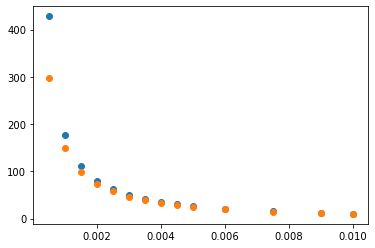

In [76]:
#Plot the charging and discharging times. 
plt.scatter(gcd.currents, gcd.cycle_times.loc['Charging'])
plt.scatter(gcd.currents, gcd.cycle_times.loc['Discharging'])

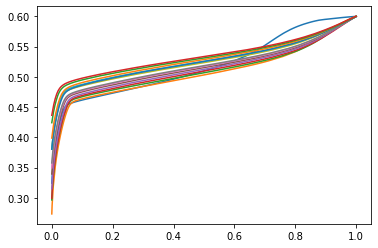

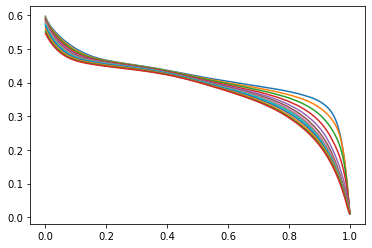

In [77]:
f_ch = np.array(gcd.charging_stretched.filter(regex = '^Vf'))
f_dis = np.array(gcd.discharging_stretched.filter(regex = '^Vf'))
t_ch = np.array(gcd.charging_stretched.iloc[:, 0])
t_dis = np.array(gcd.discharging_stretched.iloc[:, 0])
plt.plot(t_ch, f_ch)
plt.show()
plt.plot(t_dis, f_dis)
plt.show()
